In [1]:
import numpy as np
import pandas as pd
from PIL import Image as img

In [20]:
df_can= pd.read_excel('./Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20),skipfooter=2, usecols='A:AQ')
print("Data downloaded and read into a dataframe")

Data downloaded and read into a dataframe


In [21]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
#print the dimension of the dataframe
print(df_can.shape)

(195, 43)


In [23]:
#clean up the dataset to remove unnecessary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

#rename columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#for sake of consistency, make all columns labels of type string
df_can.columns= list(map(str, df_can.columns))

#set country name as index - usefull for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

#add total column
df_can['Total'] = df_can.sum(axis=1)

#years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980,2014)))
print("data dimensions: ", df_can.shape)

data dimensions:  (195, 38)


### Visualizing Data Using Matplotlib

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #needed for waffle charts

mpl.style.use('ggplot') #optional : for ggplot-like style
#check for latest version of matplotlib
print("matplotlib version", mpl.__version__)

matplotlib version 3.4.2


### Waffle Charts
biasanya dibuat untuk menampilkan progress menuju tujuan

In [25]:
#create new dataframe for Denmark, Norway, and Sweden
df_dsn= df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [26]:
#membuat waffle chart
#step1: menentukan proporsi setiap kategori sehubungan dengan totalnya

#compute the proportion of each category with respect to the total
total_values= sum(df_dsn['Total'])
category_proportion= [(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportion):
    print(df_dsn.index.values[i]+': '+ str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [27]:
#step2: menentukan ukuran keseluruhan dari waffle chart
width = 40
height = 10
total_num_tiles = width*height
print("Total number of tiles is ", total_num_tiles)

Total number of tiles is  400


In [28]:
#step 3: menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

#compute the number of tiles for each category
tiles_per_category= [round(proportion*total_num_tiles) for proportion in category_proportion]

#print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i]+": "+str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [29]:
#step 4: membuat matriks yang menyerupai waffle dan mengisinya

#initialize the waffle charts as an empty matrix
waffle_chart= np.zeros((height, width))

#define indices to loop through waffle chart
category_index= 0
tile_index= 0

#populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index+=1
        #if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            #...process to the next category
            category_index+=1
        #set the class value to an integer, which increase with class
        waffle_chart[row,col] = category_index
print("Waffle chart populated!")

Waffle chart populated!


In [30]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

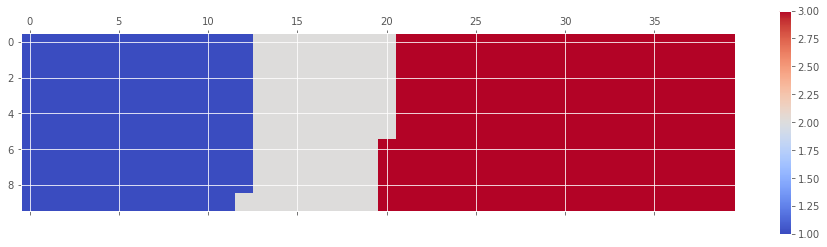

In [31]:
#step 5: petakan matrix waffle chart menjadi visual

#instantiate a new figure object
fig= plt.figure()
#use matshow to display waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

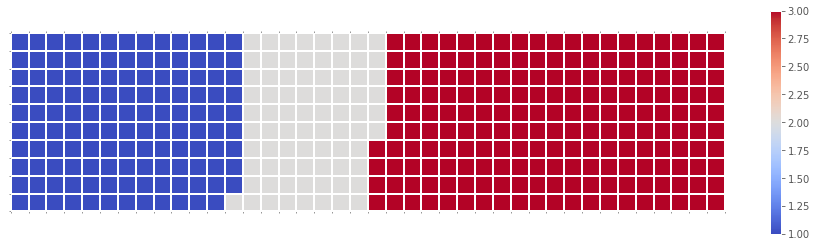

In [32]:
fig= plt.figure()
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap= colormap)
plt.colorbar()

#get axis
ax= plt.gca()
#set minor ticks
ax.set_xticks(np.arange(-.5,(width),1), minor=True)
ax.set_yticks(np.arange(-.5,(height),1), minor=True)

#add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

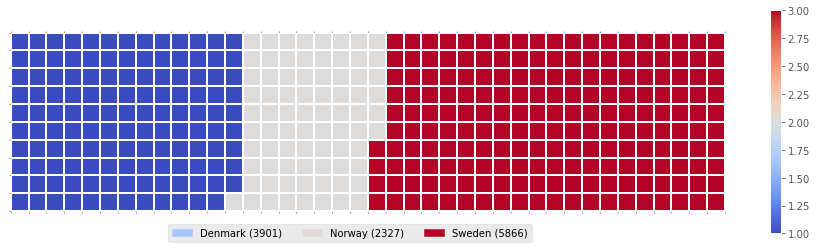

In [33]:
#step 7: tambahkan leged
fig= plt.figure()
colormap= plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax= plt.gca()
ax.set_xticks(np.arange(-.5, (width),1), minor=True)
ax.set_yticks(np.arange(-.5, (height),1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.yticks([])
plt.xticks([])

#compute cumulative sum of individual categories to match color schemes between charts and legend
values_cumsum= np.cumsum(df_dsn['Total'])
total_values= values_cumsum[len(values_cumsum)-1]

#create legend
legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str= category + ' (' + str(df_dsn['Total'][i])+')'
    color_val= colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color= color_val, label=label_str))
    
#add legend to chart
plt.legend(handles= legend_handles,
          loc= 'lower center',
          ncol= len(df_dsn.index.values),
          bbox_to_anchor= (0., -0.2, 0.95, .1)
          )

In [34]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    #compute the proportion of each category with respect to the total
    total_values= sum(values)
    category_proportions= [(float(value)/total_values) for value in values]
    
    #compute total number of tiles
    total_num_tiles= height*width
    print("Total number of tiles: ", total_num_tiles)
    
    #compute the number of tiles for each category
    tiles_per_category= [round(proportion*total_num_tiles) for proportion in category_proportions]
    #printout number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+ ': '+ str(tiles))
        
    #initialize the waffle chart as an empty matrix
    waffle_chart= np.zeros((height, width))
    
    #define indicese to loop through the waffle chart
    category_index= 0
    tile_index= 0
    
    #populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index+=1
            
            #if the number of tiles populated for the current category
            #is equal to its corresponding allocated tiles....
            if tile_index > sum(tiles_per_category[0:category_index]):
                #...proceed to the next category
                category_index+=1
                
            #set the class value to an integer, which increases with class
            waffle_chart[row, col]= category_index
            
    #instantite new figure object
    fig= plt.figure()
    
    #use matshow to display waffle chart
    colormap= plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap= colormap)
    plt.colorbar()
    
    #get the axis
    ax= plt.gca()
    
    #set minor ticks
    ax.set_xticks(np.arange(-.5, (width),1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    #add grid lines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.xticks([])
    plt.yticks([])
    
    #compute cumulative sum of individual categories to match color shcemes between chart and legend
    values_cumsum=np.cumsum(values)
    total_values= values_cumsum[len(values_cumsum)-1]
    
    #create legend
    legend_handles=[]
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str= category + '( ' + str(values[i]) + value_sign + ')'
        else:
            label_str= category + '( ' + value_sign + str(values[i]) + ')'
        
        color_val= colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    #add legend to chart
    plt.legend(handles= legend_handles,
              loc= 'lower center',
              ncol= len(categories),
              bbox_to_anchor= (0., -0.2, 0.95, .1)
              )
        
    

In [35]:
width= 40
height= 10
categories= df_dsn.index.values
values= df_dsn['Total']
colormap= plt.cm.coolwarm



Total number of tiles:  400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

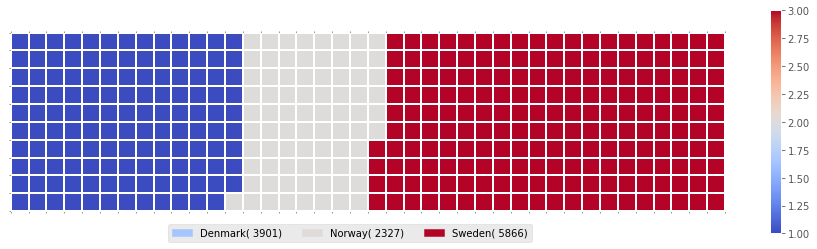

In [36]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [2]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from wordcloud import WordCloud, STOPWORDS
print("Wordcloud is installed and imported")

Wordcloud is installed and imported


In [4]:
# !wget --quite https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

import urllib.request
# url= 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
# filename= 'alice_novel.txt'
# urllib.request.urlretrieve(url, filename)

# print("file downloaded and saved")

In [5]:
alice_novel= open('alice_novel.txt', 'r').read()

In [6]:
stopwords= set(STOPWORDS)

In [7]:
#instantiate a word cloud object
alice_wc= WordCloud(background_color='white',
                   max_words=2000,
                   stopwords=stopwords)

#generate the wordcloud
alice_wc.generate(alice_novel)


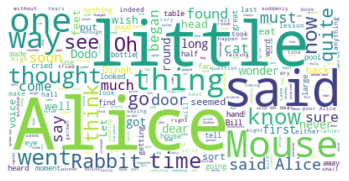

In [10]:
#display wordcloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

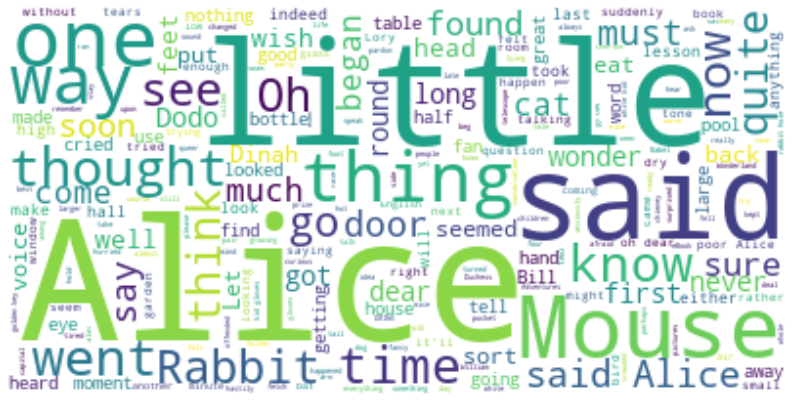

In [11]:
fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

#display wordcloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

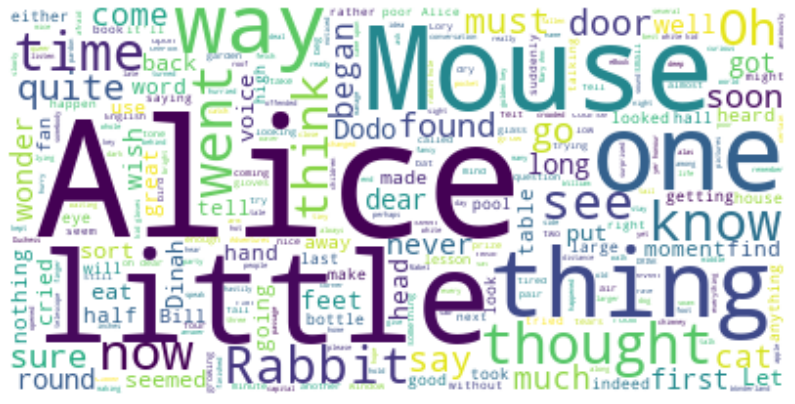

In [12]:
#karena said bukan kata yang informatif, mari kita tambahkan ke stopword
stopwords.add('said')
alice_wc.generate(alice_novel)

#display wordcloud
fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
url= 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png'
filename= 'alice_mask.png'
urllib.request.urlretrieve(url, filename)
alice_mask= np.array(img.open('alice_mask.png'))
print("file downloaded and saved")

file downloaded and saved


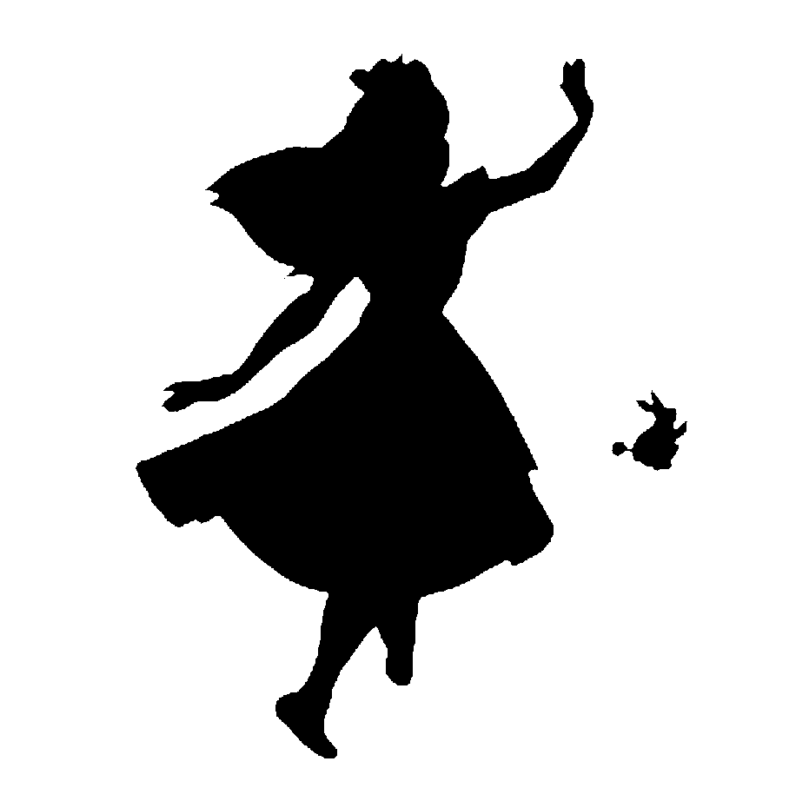

In [18]:
fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

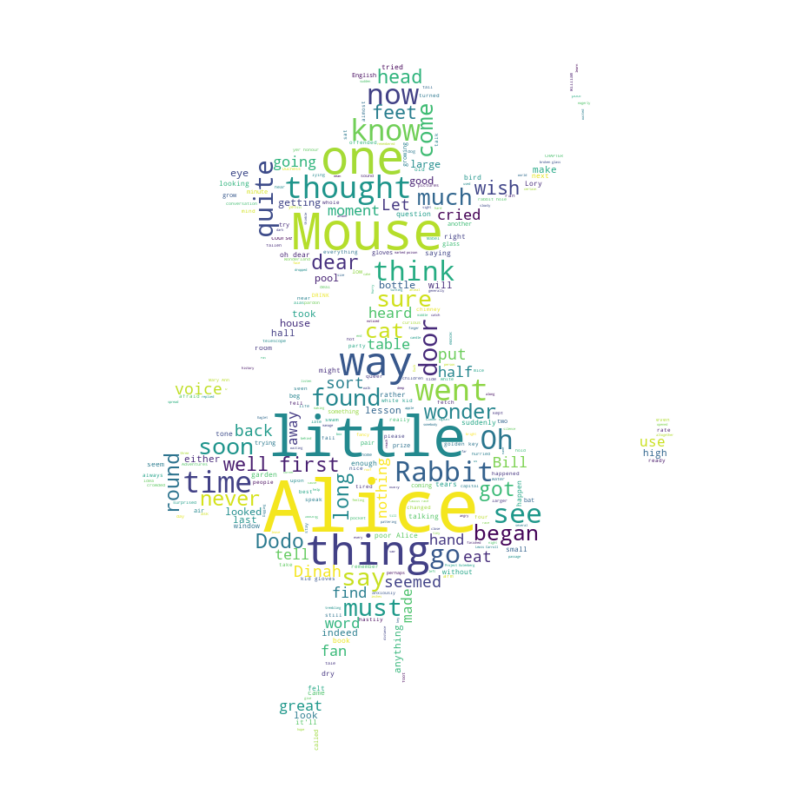

In [19]:
#instantiate a word cloud object
alice_wc= WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
#generate the word cloud
alice_wc.generate(alice_novel)

#display the word cloud
fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [38]:
total_immigration= df_can['Total'].sum()
total_immigration

6409153

In [40]:
max_words= 90
word_string=''
for country in df_can.index.values:
    #check if country's name is a single word name
    if len(country.split(' '))==1:
        repeat_num_times= int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string= word_string + ((country + ' ')*repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [41]:
wordcloud= WordCloud(background_color='white').generate(word_string)
print("Word Cloud created")

Word Cloud created


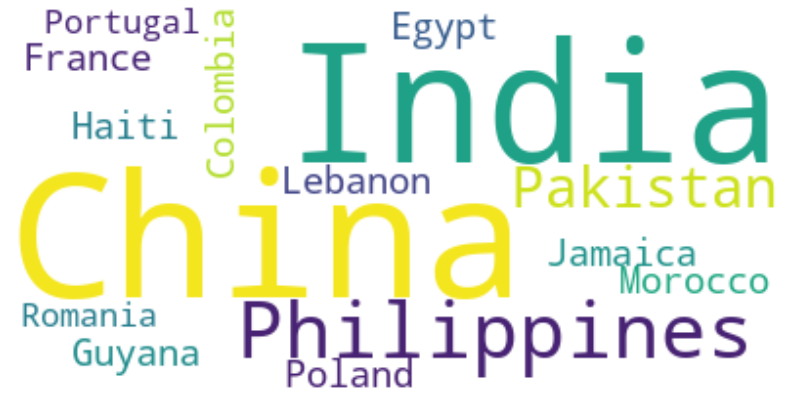

In [42]:
#display the cloud
fig= plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [43]:
# install seaborn
!pip3 install seaborn

import seaborn as sns
print("seaborn installed and imported!")

Defaulting to user installation because normal site-packages is not writeable
seaborn installed and imported!


In [45]:
#we can use the sum() method to get the total population per year
df_tot= pd.DataFrame(df_can[years].sum(axis=0))

#change the years to type float (usefull to regression for later on)
df_tot.index= map(float, df_tot.index)

#reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

#rename columns
df_tot.columns= ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


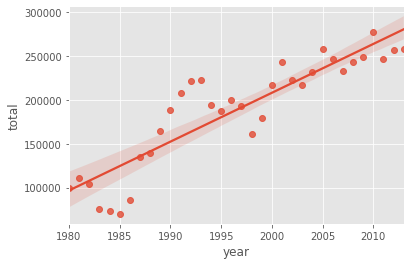

In [47]:
ax= sns.regplot(x='year', y='total', data=df_tot)

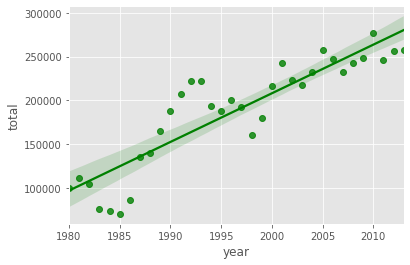

In [48]:
ax= sns.regplot(x='year', y='total', data=df_tot, color='green')

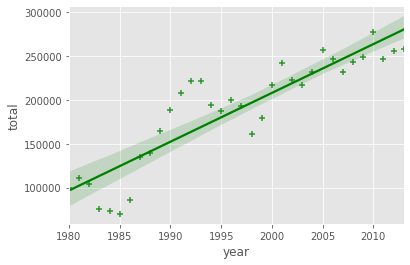

In [50]:
ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

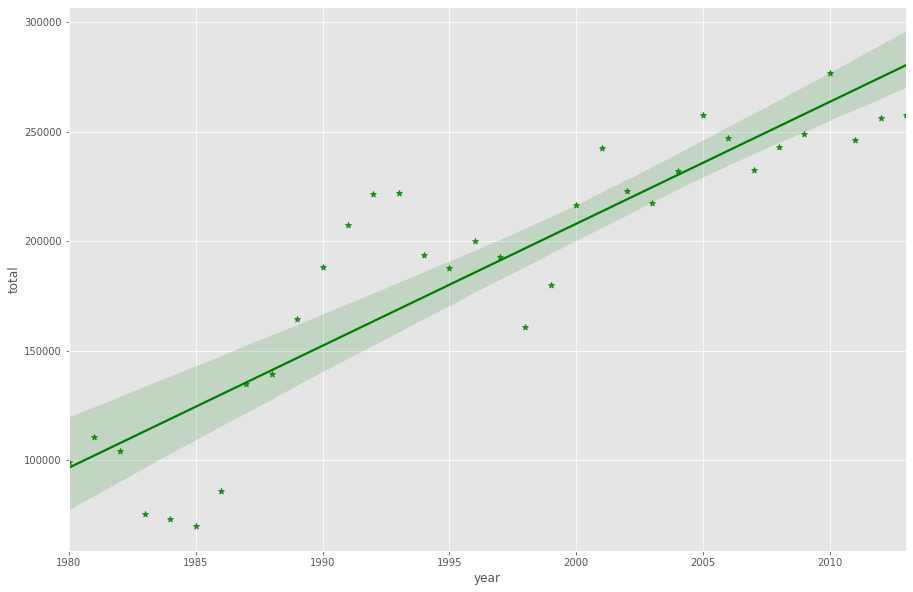

In [52]:
plt.figure(figsize=(15,10))
ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

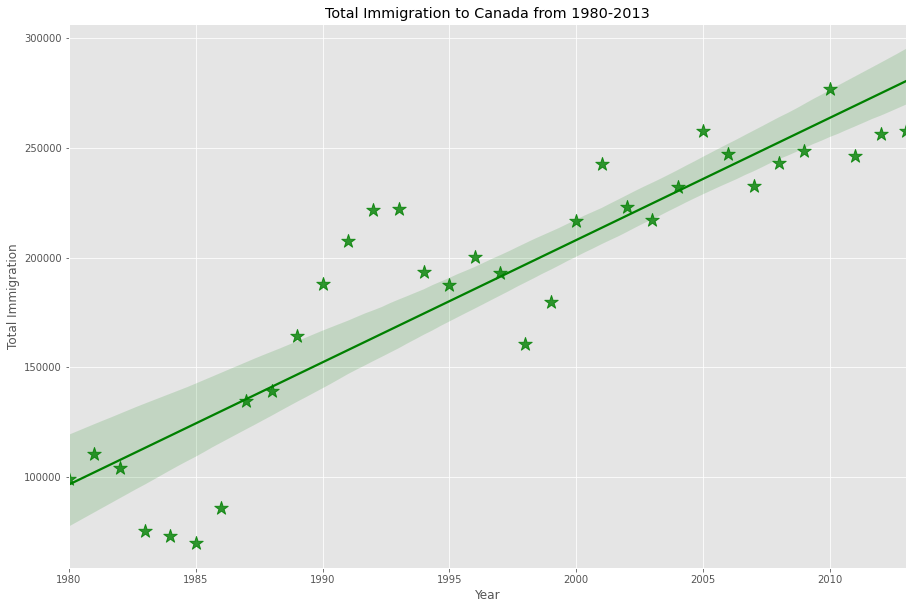

In [53]:
plt.figure(figsize=(15,10))
ax= sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title("Total Immigration to Canada from 1980-2013")

Text(0.5, 1.0, 'Total Immigration to Canada from 1980-2013')

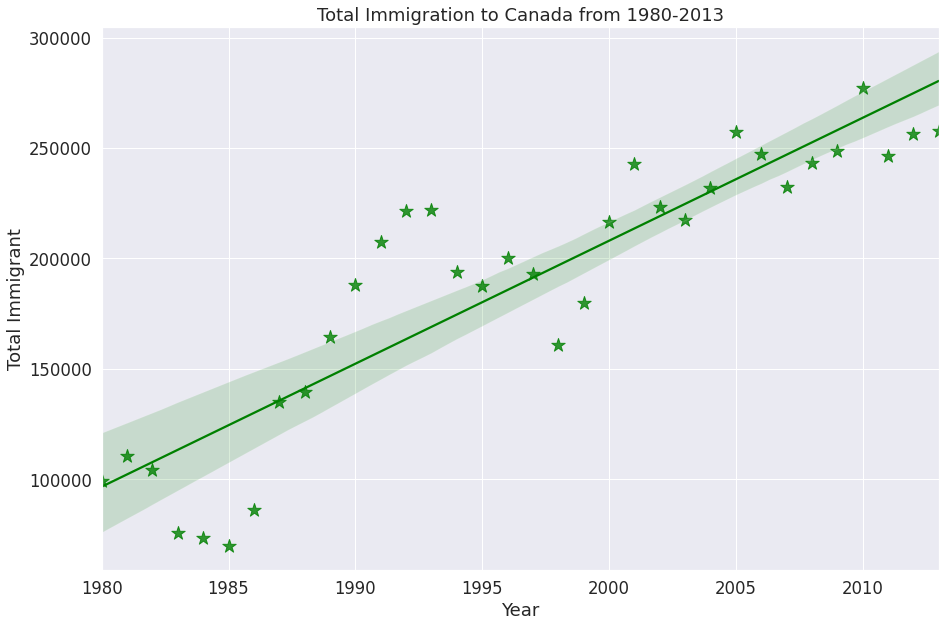

In [54]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)

ax=sns.regplot(x='year', y='total', data=df_tot, color= 'green', marker='*', scatter_kws={'s':200})
ax.set(xlabel= 'Year', ylabel='Total Immigrant')
ax.set_title("Total Immigration to Canada from 1980-2013")

Question: use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Norway, and Sweden to Canada from 1980-2013